# French Bonds Analysis
This notebook scrapes French funds data from tradingeconomics.com , performs analysis, and creates visualizations.

In [30]:
import numpy as np
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('deep')


# Web Scraping

In [31]:
def scrape_french_bonds():
    url = 'https://tradingeconomics.com/france/20-year-bond-yield'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Initialize lists to store data
        maturities = []
        yields = []
        
        # Find the table containing bond data
        table = soup.find('table')
        if table:
            rows = table.find_all('tr')[1:]  # Skip header row
            for row in rows:
                cols = row.find_all('td')
                if len(cols) >= 2:
                    maturities.append(cols[0].text.strip())
                    yields.append(float(cols[1].text.strip().replace('%', '')))
        
        # Create DataFrame
        df = pd.DataFrame({
            'Maturity': maturities,
            'Yield': yields
        })
        
        return df
    
    except Exception as e:
        print(f'Error scraping data: {e}')
        return None

# Fecth The Data

In [32]:
bonds_df = scrape_french_bonds()

if bonds_df is not None:
    print('French Government Bonds Data:')
    display(bonds_df)

French Government Bonds Data:


,Maturity,Yield
0,France 10Y,3.22
1,France 1M,2.46
2,France 52W,2.26
3,France 20Y,3.54
4,France 2Y,2.21
5,France 30Y,3.77
6,France 3M,2.46
7,France 3Y,2.33
8,France 5Y,2.64
9,France 6M,2.36


# Yield Curve

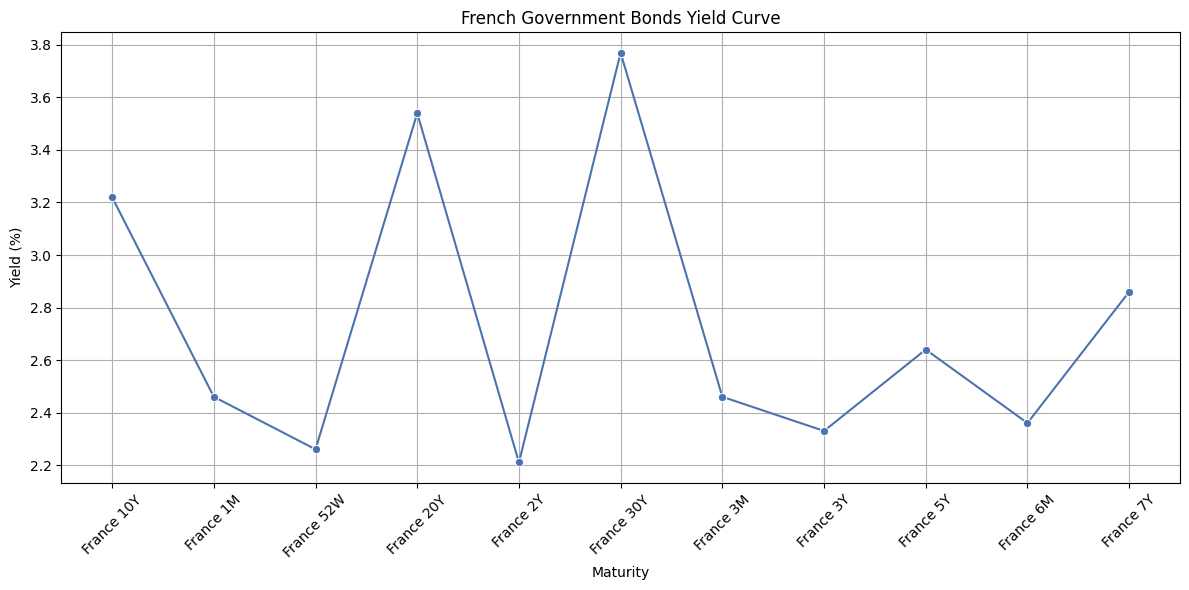

In [33]:
if bonds_df is not None:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=bonds_df, x='Maturity', y='Yield', marker='o')
    plt.title('French Government Bonds Yield Curve')
    plt.xlabel('Maturity')
    plt.ylabel('Yield (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# The Statistical Information: Variance, Expected Value, Standard Deviation
The average yield of 2.74% indicates that the current yields on French government bonds are relatively moderate. Investors seeking very high yields may find this level less attractive compared to other higher-yielding asset classes, which would likely come with higher risk.The yield curve indicates a relatively flat environment. The low variance (0.29) and standard deviation (0.54%) point towards a relatively flat yield curve at the time of scraping the data. This implies that investors aren't being significantly compensated with higher yields for taking on longer-term maturity risk within the French government bond market, based on this data.

Implication for Maturity Selection: In a flatter yield curve environment, the decision of whether to invest in short-term or long-term French government bonds might be less driven by yield differences and more by factors like:Interest Rate Expectations: If investors anticipate interest rates to rise, they might prefer shorter-term bonds to reinvest at higher rates sooner. If they expect rates to fall, longer-term bonds could lock in current yields for longer.Investment Horizon: Shorter-term bonds are more suitable for shorter investment horizons, while longer-term bonds are better suited to longer-term liabilities or investment goals.



In [38]:
if bonds_df is not None:
    
    average_yield = bonds_df['Yield'].mean()
    variance_yield = bonds_df['Yield'].var()
    std_deviation_yield = bonds_df['Yield'].std()

    print("\nStatistics for Current Yield Curve Data:")
    print(f"Average Yield: {average_yield:.2f}")
    print(f"Variance of Yield: {variance_yield:.2f}")
    print(f"Standard Deviation of Yield: {std_deviation_yield:.2f}")
else:
    print("bonds_df is None.  Cannot calculate statistics.")


Statistics for Current Yield Curve Data:
Average Yield: 2.74
Variance of Yield: 0.29
Standard Deviation of Yield: 0.54


# Analysis of volatiles
 The analysis of historical volatility suggests that French 20-Year Government Bonds are currently experiencing a period of unusually high volatility. This presents both risks and potential opportunities. Risk-averse investors should be cautious and consider reducing exposure, while risk-seeking investors might find opportunities but need to manage risk carefully. All investors should stay informed and understand their own risk tolerance.

c:\Users\egeuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


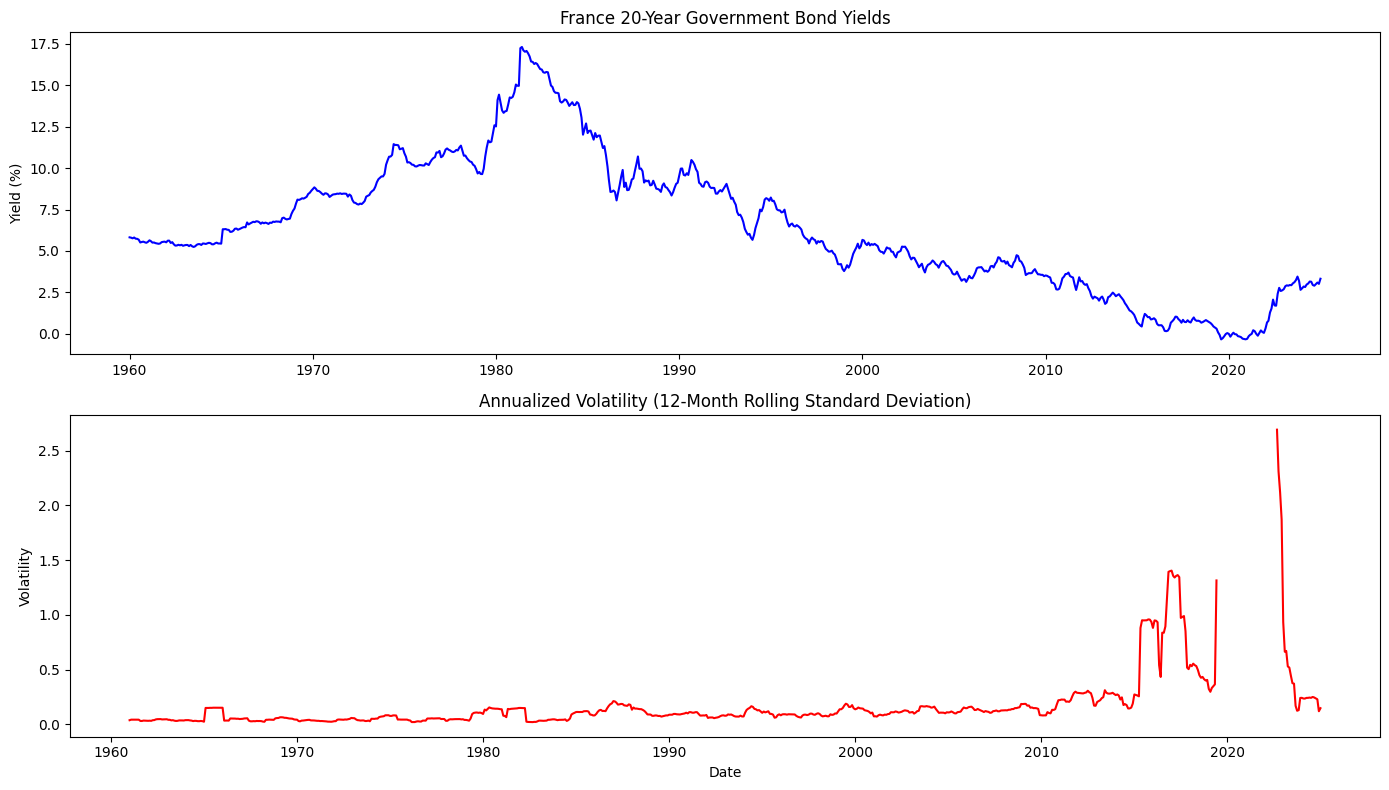

In [35]:
df = pd.read_csv('IRLTLT01FRM156N.csv', parse_dates=['observation_date'])
df.set_index('observation_date', inplace=True)
df.dropna(inplace=True)
df['log_return'] = np.log(df['IRLTLT01FRM156N'] / df['IRLTLT01FRM156N'].shift(1))

# Calculate annualized volatility (12-month rolling window, scaled by √12 for annualization)
window_size = 12
df['volatility'] = df['log_return'].rolling(window=window_size).std() * np.sqrt(12)

# Visualization
plt.figure(figsize=(14, 8))

# Plot bond yields
plt.subplot(2, 1, 1)
plt.plot(df.index, df['IRLTLT01FRM156N'], color='blue')
plt.title('France 20-Year Government Bond Yields')
plt.ylabel('Yield (%)')

# Plot volatility
plt.subplot(2, 1, 2)
plt.plot(df.index, df['volatility'], color='red')
plt.title('Annualized Volatility (12-Month Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()

# Spread Analysis (France-Germany Bond Spread)
Risk Indicator: The France-Germany 10-year bond spread reflects the perceived risk of France relative to Germany. A positive spread indicates that France is perceived as riskier. The wider the spread, the higher the relative risk of France.

Yield Opportunity: A higher spread implies a higher yield potential for French bonds relative to German bonds. This can be attractive for yield-seeking investors. However, this comes at a higher risk.

Dynamic and variable: The spread is not fixed. It changes constantly depending on economic conditions, political events and market sentiment. We have seen volatility and an uptrend, especially after 2017, with a significant widening after 2022.

Widening after 2022: The significant widening of the spread after 2022 reflects factors such as the war in Ukraine, the energy crisis, inflation and increased risk aversion. This led to increased demand for German Bunds and a widening of the spread.

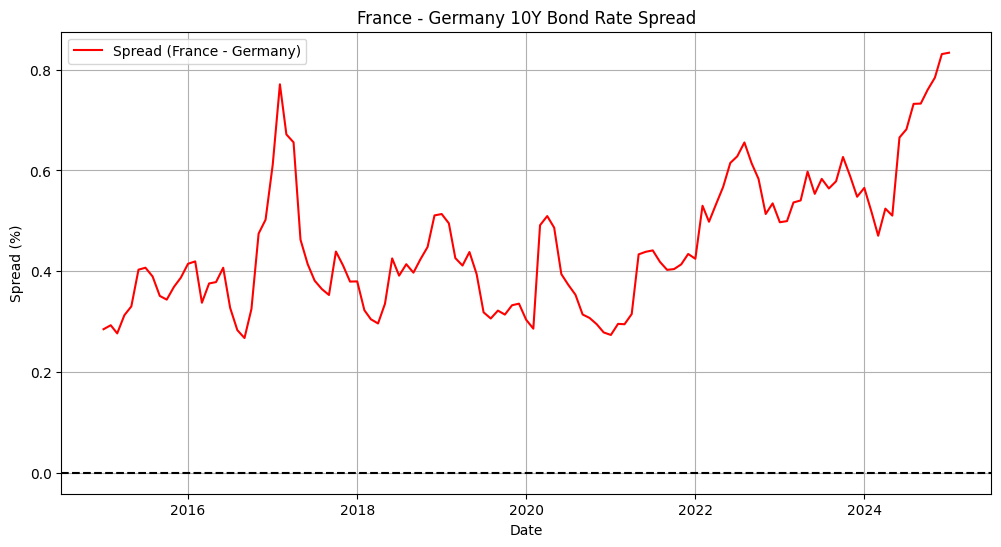

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_germany = pd.read_csv("IRLTLT01DEM140N.csv", parse_dates=["observation_date"], index_col="observation_date")
df_france = pd.read_csv("IRLTLT01FRM140N.csv", parse_dates=["observation_date"], index_col="observation_date")

# Create DataFrame with correct column names and calculate spread
df = pd.DataFrame()
df["OAT_10Y"] = df_france["IRLTLT01FRM156N"]
df["Bund_10Y"] = df_germany["IRLTLT01DEM156N"]
df["Spread (OAT-Bund)"] = df["OAT_10Y"] - df["Bund_10Y"]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Spread (OAT-Bund)"], label="Spread (France - Germany)", color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.title("France - Germany 10Y Bond Rate Spread")
plt.xlabel("Date")
plt.ylabel("Spread (%)")
plt.legend()
plt.grid(True)
plt.show()
